In [5]:
import numpy as np
import matplotlib.pyplot as plt

from astropy.constants import c, hbar, m_n, M_sun
from astropy import units as u

from scipy.integrate import odeint

In [6]:
AZ = 1
K_nonrel = (hbar ** 2 / 15 / np.pi**2 / m_n * ((3 * np.pi**2)/ (m_n * c**2 * AZ)) **(5/3)).to('cm2 / erg**(2/3)')
gamma = 5/3
R0 = 1.473 * u.km

alpha = 1 * u.km

e_0 = (( (R0 / alpha) ** gamma / K_nonrel ) **( 1/(gamma-1))).to('erg/cm3')

beta = (4 * np.pi * e_0 / (M_sun * c**2 * (K_nonrel * e_0 **(gamma-1))**(1/gamma))).to('1/km3')
    
K = K_nonrel * (e_0 **(gamma-1))


#estimate central pressure  for 1 solar mass radius 10 km
M = 1 * M_sun
R = 10 * u.km
P_c_units = (K_nonrel * ( (3 * M * c**2) / (4 * np.pi * R**3) )**gamma).to('erg/cm3')

P_c = P_c_units / e_0
print(f'Central pressure for M={M:.2e}, R={R}: P_c={P_c:.2}')
print('Energy density unit:', e_0)

Central pressure for M=1.99e+30 kg, R=10.0 km: P_c=9.6e-05
Energy density unit: 1.6158459552580226e+38 erg / cm3


Basically Central pressure P_c = 1e-4

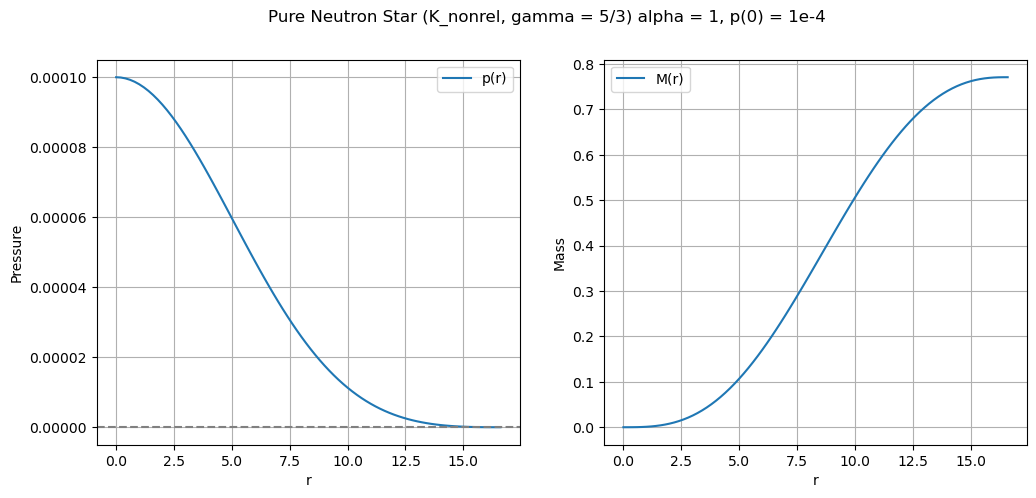

R = 10.0 km
M(R) = 0.7707249199397783 solar masses
p(R)= -1.609412755578279e-14 almost zero


In [7]:
def ode(x, r):

    p, M = x
    if p <= 0:
        return [0, 0]  
    
    dpdr = - alpha.value * M * p**(1/gamma) / r**2
    dMdr = beta.value * r**2 * p**(1/gamma)
    return [dpdr, dMdr]

x_init = [1e-4, 0]
r = np.linspace(0.001, 100000, 500000)  # integra llarg

sol = odeint(ode, x_init, r)

p = sol[:,0]
M = sol[:,1]

idx = np.where(p<=0)[0] # array amb els índexs on p<=0
if len(idx) > 0: 
    cutoff = idx[0]
    r = r[:cutoff+1]
    p = p[:cutoff+1]
    M = M[:cutoff+1]

'''
#He intentat afegir les correcions relativistes, pero 
# 1 no t'he sentit físic en el règim no relativista i 
# 2 no m'ha funcionat l'integració numèrica


K = K_nonrel

R = r[-1]


def TOV(x, r):

    p, M = x
    if p <= 0:
        return [0, 0]  
    
    term1 = alpha.value * M * p**(1/gamma) / r**2 
    term2 = 1 - (K_nonrel * (e_0 * p)**(gamma-1))**(1/gamma)
    term3 = 1 + 4 * np.pi * e_0 / (c**2 * M_sun) * p / M * r**3 * u.km**3
    term4 = 1 - 2 * R0 * M / r / u.km

    
    dpdr = - term1 * term2 * term3 / term4
    dMdr = beta.value * r**2 * p**(1/gamma)
    return [dpdr, dMdr]

x_init = [1e-4, 0.001]
r_TOV = np.linspace(0.001, 100000, 500000)  # integra llarg

sol = odeint(TOV, x_init, r_TOV)

p_TOV = sol[:,0]
M_TOV = sol[:,1]

idx = np.where(p<=0)[0] # array amb els índexs on p<=0
if len(idx) > 0: 
    cutoff = idx[0]
    r_TOV = r_TOV[:cutoff+1]
    p_TOV = p_TOV[:cutoff+1]
    M_TOV = M_TOV[:cutoff+1]

'''


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.plot(r, p, label="p(r)")
#ax1.plot(r_TOV, p_TOV, label="p(r) TOV")
ax1.axhline(0, color="gray", linestyle="--")
ax1.set_xlabel('r')
ax1.set_ylabel('Pressure')
ax1.legend()
ax1.grid()


ax2.plot(r, M, label="M(r)")
#ax2.plot(r_TOV, M_TOV, label="M(r) TOV")
ax2.set_xlabel('r')
ax2.set_ylabel('Mass')
ax2.grid()
ax2.legend()

fig.suptitle('Pure Neutron Star (K_nonrel, gamma = 5/3) alpha = 1, p(0) = 1e-4')

plt.show()


print("R =", R)
print("M(R) =", M[-1], 'solar masses')
print('p(R)=',p[-1], 'almost zero')
#print("\nWith TOV:")
#print("R =", r[-1])
#print("M(R) =", M_TOV[-1], 'solar masses')
#print('p(R)=',p[-1], 'almost zero')




# Relativistic Regime

In [8]:
gamma = 1
K_rel = 1/3 
R0 = 1.473 

alpha = 3 * R

#e_0 = (( (R0 / alpha) ** gamma / K_rel ) **( 1/(gamma-1)))
# utilitza e_0 d'abans!! erg/cm3

e_0 = e_0

beta = (4 * np.pi * e_0 / (M_sun * c**2 * K_rel)).to('1/km3')


a = (4 * np.pi * e_0 / (c**2 * M_sun) * u.cm**3).to(u.dimensionless_unscaled)




#estimate central pressure  for 1 solar mass radius 10 km
M = 1 * M_sun
R = 10 * u.km
P_c_units = (K_rel * ( (3 * M * c**2) / (4 * np.pi * R**3) )).to('erg/cm3')

P_c = P_c_units / e_0
print(f'Central pressure for M={M:.2e}, R={R}: P_c={P_c:.2}')
print('beta:', beta)


Central pressure for M=1.99e+30 kg, R=10.0 km: P_c=0.00088
beta: 3.4086605785673303 1 / km3


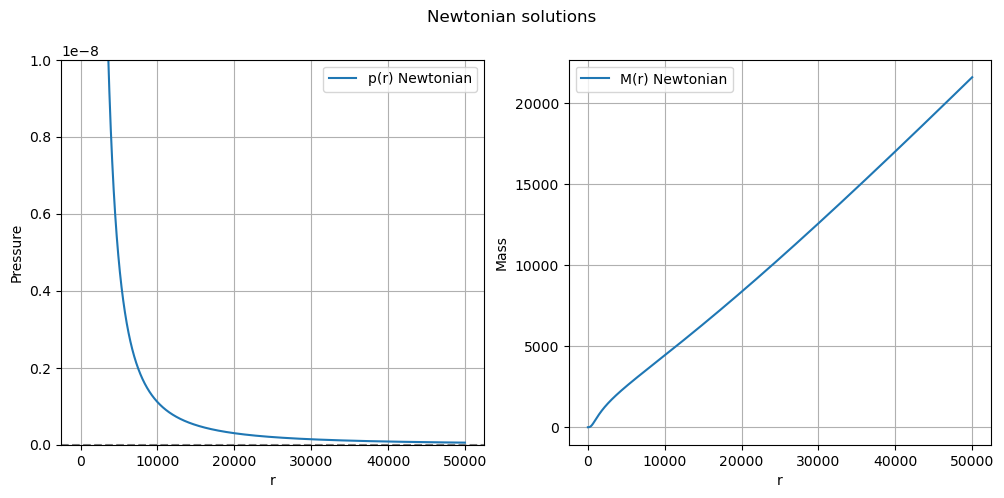

Newtonian:
  R = 50000.0
  M(R) = 21585.987882953097 solar masses
  p(R) = 5.427293166721172e-11 ≈ 0


In [9]:
#for gamma = 1
gamma = 1
K_rel = 1/3 
R0 = 1.473 

alpha = 3 * R0


beta = (4 * np.pi * e_0 / (M_sun * c**2 * K_rel)).to(1/u.km**3).value
a = (4 * np.pi * e_0 / (c**2 * M_sun) * u.cm**3).value


# ---- Newtonian equations ----
def ode_NR(x, r):
    p, M = x
    
    dpdr = - alpha * M * p / r**2
    dMdr = beta * r**2 * p

    return [dpdr, dMdr]


# ---- Initial conditions ----
x_init = [1e-4, 0.1]   # p(0), M(0)
r_NR  = np.linspace(0.1, 50000, 500000)
r_TOV = np.linspace(0.1, 50000, 500000)

# ---- Solve Newtonian ----
sol_NR = odeint(ode_NR, x_init, r_NR)
p_NR, M_NR = sol_NR[:,0], sol_NR[:,1]



# ---- Plot results ----
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.plot(r_NR, p_NR, label="p(r) Newtonian")
ax1.axhline(0, color="gray", linestyle="--")
ax1.set_xlabel('r')
ax1.set_ylabel('Pressure')
ax1.legend()
ax1.set_ylim([0,1e-8])
ax1.grid()

ax2.plot(r_NR, M_NR, label="M(r) Newtonian")
ax2.set_xlabel('r')
ax2.set_ylabel('Mass')
ax2.legend()
ax2.grid()

fig.suptitle('Newtonian solutions')
plt.show()

# ---- Results ----
print("Newtonian:")
print("  R =", r_NR[-1])
print("  M(R) =", M_NR[-1], "solar masses")
print("  p(R) =", p_NR[-1], "≈ 0")



Newtonian solution: The pressure never gets to zero, for any integration range of r. So pressure gets infinitesimal small and mass keeps 'growing' with r. Something is off I would expect mass to stop growing after a certain r.

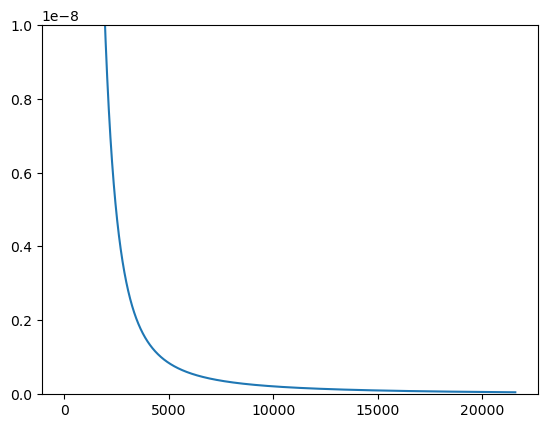

In [10]:
plt.plot(M_NR, p_NR)
plt.ylim(0, 1e-8)
plt.show()

#com M creix linealment (com r) te la mateixa forma

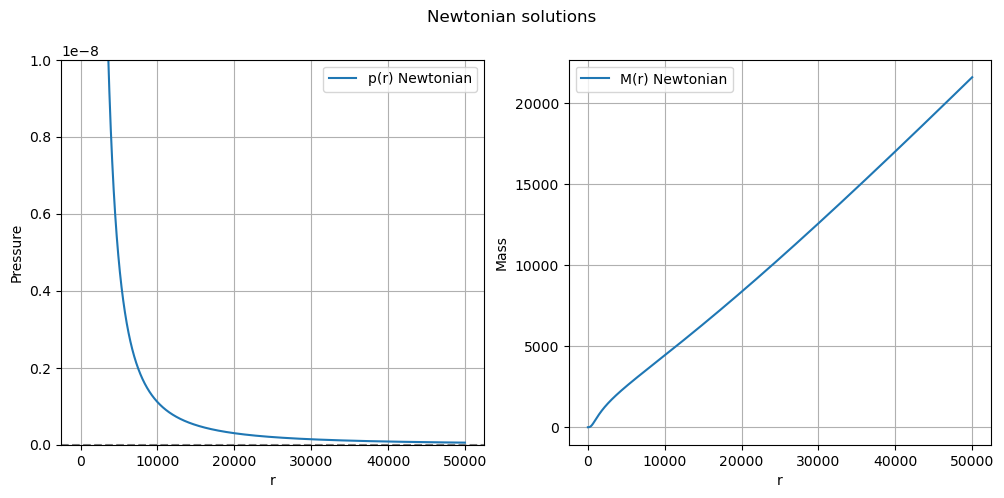

Newtonian:
  R = 50000.0
  M(R) = 21585.987882953097 solar masses
  p(R) = 5.427293166721172e-11 ≈ 0

TOV:
  R = 50000.0
  M(R) = 2.575978337198004e+20 solar masses
  p(R) = 2418290.2669867575 ≈ 0


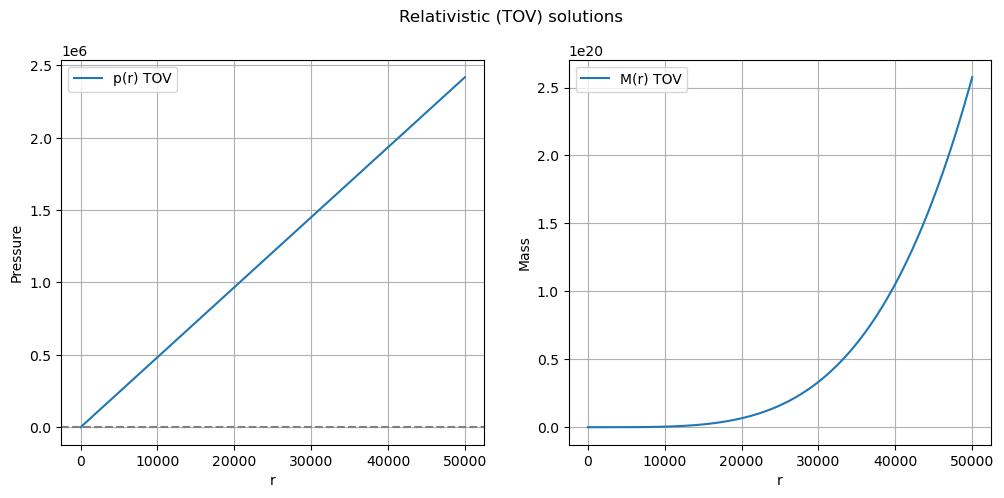

In [11]:
#for gamma = 1
gamma = 1
K_rel = 1/3 
R0 = 1.473 

alpha = 3 * R0


beta = (4 * np.pi * e_0 / (M_sun * c**2 * K_rel)).to(1/u.km**3).value
a = (4 * np.pi * e_0 / (c**2 * M_sun) * u.cm**3).value


# ---- Newtonian equations ----
def ode_NR(x, r):
    p, M = x
    
    dpdr = - alpha * M * p / r**2
    dMdr = beta * r**2 * p

    return [dpdr, dMdr]

# ---- TOV equations ----
def ode_TOV(x, r):
    p, M = x

    
    term1 = alpha * M * p / r**2
    term2 = 1 - K_rel
    
    term3 = 1 + a * p / M * r**3
    term4 = 1 - 2 * R0 * M / r 

    if term4 == 0:
       return [0, 0]

    
    dpdr = - term1 * term2 * term3 / term4
    dMdr = beta * r**2 * p
    return [dpdr, dMdr]


# ---- Initial conditions ----
x_init = [1e-4, 0.1]   # p(0), M(0)
r_NR  = np.linspace(0.1, 50000, 500000)
r_TOV = np.linspace(0.1, 50000, 500000)

# ---- Solve Newtonian ----
sol_NR = odeint(ode_NR, x_init, r_NR)
p_NR, M_NR = sol_NR[:,0], sol_NR[:,1]

# ---- Solve TOV ----
sol_TOV = odeint(ode_TOV, x_init, r_TOV)
p_TOV, M_TOV = sol_TOV[:,0], sol_TOV[:,1]


# ---- Plot results ----
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.plot(r_NR, p_NR, label="p(r) Newtonian")
ax1.axhline(0, color="gray", linestyle="--")
ax1.set_xlabel('r')
ax1.set_ylabel('Pressure')
ax1.legend()
ax1.set_ylim([0,1e-8])
ax1.grid()

ax2.plot(r_NR, M_NR, label="M(r) Newtonian")
ax2.set_xlabel('r')
ax2.set_ylabel('Mass')
ax2.legend()
ax2.grid()

fig.suptitle('Newtonian solutions')
plt.show()

# ---- Results ----
print("Newtonian:")
print("  R =", r_NR[-1])
print("  M(R) =", M_NR[-1], "solar masses")
print("  p(R) =", p_NR[-1], "≈ 0")

print("\nTOV:")
print("  R =", r_TOV[-1])
print("  M(R) =", M_TOV[-1], "solar masses")
print("  p(R) =", p_TOV[-1], "≈ 0")


# ---- Plot results ----
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

#ax1.plot(r_NR, p_NR, label="p(r) Newtonian")
ax1.plot(r_TOV, p_TOV, label="p(r) TOV")
ax1.axhline(0, color="gray", linestyle="--")
ax1.set_xlabel('r')
ax1.set_ylabel('Pressure')
ax1.legend()
ax1.grid()

#ax2.plot(r_NR, M_NR, label="M(r) Newtonian")
ax2.plot(r_TOV, M_TOV, label="M(r) TOV")
ax2.set_xlabel('r')
ax2.set_ylabel('Mass')
ax2.legend()
ax2.grid()


fig.suptitle('Relativistic (TOV) solutions')
plt.show()


TOV solution: Is not working

# Find better EOS

i.e. valid for all k_f

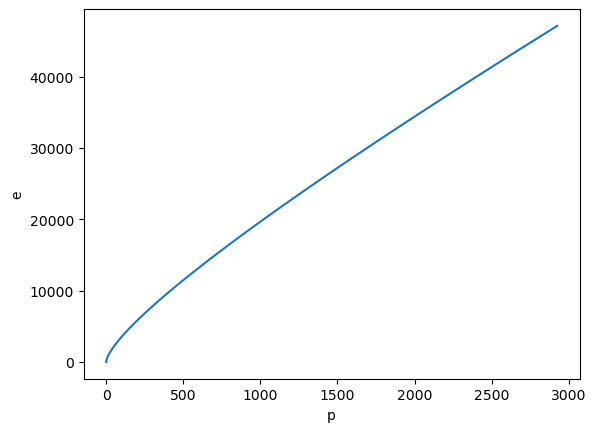

In [12]:
#e = A_NR * p **(5/3) + A_R * p

#Find best parameters

#compute e(k_f) and p(k_f)

x = np.linspace(0, 2, 100) #k_f = x * m_n * c
n = ((x * m_n * c)**3 / (3 * np.pi **2 * hbar**3)).to('1/cm3')

e_0 = (m_n ** 4 * c ** 5 / (3 * np.pi**2 * hbar) ** 3 ).to('erg/cm3')

# ---- Energy density ----

e_x = (m_n ** 4 * c ** 5 / (8 * np.pi * hbar ** 3 ) * ((2 * x **3 + x)*(1 + x **2)**(1/2)-  np.arcsinh(x))).to('erg/cm3') #kinetik energy
e_x += n * m_n * 1 * c**2 #rest mass energy

e = e_x /e_0
# ---- Pressure ----

p_x = (m_n **4 * c ** 5 / (24 * np.pi **2 * hbar**3) * ((2 * x **3 - 3 * x) * (1 + x **2)**(1/2) + 3 * np.arcsinh(x))).to('erg/cm3')
p = p_x /e_0

# ---- Plot ----

plt.plot(p,e)
plt.xlabel('p')
plt.ylabel('e')

plt.show()


In [13]:
# --- k_F grid ---
x = np.linspace(0.01, 5, 200)  # avoid zero (to prevent division issues)

# --- Number density n ---
n = ((x * m_n * c)**3 / (3 * np.pi **2 * hbar**3)).to('1/cm3')

# --- Normalization constant ---
e_0 = (m_n ** 4 * c ** 5 / (3 * np.pi**2 * hbar) ** 3 ).to('erg/cm3')

e_0 = 5.346e36 * u.erg / u.cm **3

# --- Energy density (kinetic + rest mass) ---
e_x = (m_n ** 4 * c ** 5 / (8 * np.pi * hbar ** 3 ) * 
       ((2 * x **3 + x) * np.sqrt(1 + x **2) - np.arcsinh(x))).to('erg/cm3')

e_x += n * m_n * c**2  # rest mass energy

e = (e_x / e_0).value

# --- Pressure ---
p_x = (m_n **4 * c ** 5 / (24 * np.pi **2 * hbar**3) * 
       ((2 * x **3 - 3 * x) * np.sqrt(1 + x **2) + 3 * np.arcsinh(x))).to('erg/cm3')
p = (p_x / e_0).value

# --- Fit function ---
def eos_model(p, A_NR, A_R):
    return A_NR * p**(3/5) + A_R * p

# --- Fit using curve_fit ---
mask = p > 0   # avoid log of negative/zero
p_fit = p[mask]
e_fit = e[mask]

params, cov = curve_fit(eos_model, p_fit, e_fit, p0=[1.0, 1.0])
A_NR, A_R = params
print("Best fit parameters:")
print(f"A_NR = {A_NR:.6f}")
print(f"A_R   = {A_R:.6f}")

# --- Plot ---
plt.figure(figsize=(7,5))
plt.plot(p, e, 'b', label='Data (from k_f)')
plt.plot(p_fit, eos_model(p_fit, *params), 'r--', label=f'Fit: A_NR={A_NR:.3f}, A_R={A_R:.3f}')
plt.xlabel("p (dimensionless)")
plt.ylabel("e (dimensionless)")
plt.legend()
plt.grid()
plt.show()


NameError: name 'curve_fit' is not defined

In [ ]:
e_0

<Quantity 5.346e+36 erg / cm3>

Vaig a afegir un markdown al codi

Vaig a afegir un segon markdown mer assegurar-me que ho se fer, i a mes, en una altra branca

holahola tercer intentt, no me nhe sortit de canviar la branca